<a href="https://colab.research.google.com/github/joterolyj/Coderhouse/blob/main/Wine_Quality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CALIDAD DEL VINO

In [92]:
# Importar librerias
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style as style

In [94]:
# Cargar dataset
red_wine = pd.read_csv('https://raw.githubusercontent.com/joterolyj/Coderhouse/refs/heads/main/winequality-red.csv', sep=";")
red_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [95]:
# Dimensión del dataset
red_wine.shape

(1599, 12)

In [96]:
# Información del dataset
red_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1597 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [97]:
# Convierto a valor numérico las columnas object
red_wine['density'] = pd.to_numeric(red_wine['density'], errors='coerce')
red_wine['alcohol'] = pd.to_numeric(red_wine['alcohol'], errors='coerce')

# Convierto columna a float64
red_wine['density'] = red_wine['density'].astype('float64')
red_wine['alcohol'] = red_wine['alcohol'].astype('float64')

In [98]:
# Información del dataset luego de aplicar los cambios
red_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1597 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [99]:
# Datos estadísticos
red_wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1597.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087395,15.874922,46.467792,0.996696,3.311113,0.658149,10.510739,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047058,10.460157,32.895324,0.001777,0.154386,0.169507,3.651577,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997820,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.000000,4.010000,2.000000,150.000000,8.000000


In [100]:
red_wine.isnull().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


In [101]:
# Corrigo valores nulos por los valores de la mediana
red_wine['density'] = red_wine['density'].fillna(red_wine['density'].median())
red_wine['alcohol'] = red_wine['alcohol'].fillna(red_wine['alcohol'].median())

In [102]:
# Chequeo valores nulos luego de corregirlos
red_wine.isnull().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


In [103]:
# Datos estadísticos despues de corregir valores nulos
red_wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087395,15.874922,46.467792,0.996696,3.311113,0.658149,10.510350,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047058,10.460157,32.895324,0.001777,0.154386,0.169507,3.649308,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997820,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.000000,4.010000,2.000000,150.000000,8.000000


In [104]:
# Eliminar valores outliers que afectan el resultado
red_wine = red_wine[(red_wine["density"] < 1.1)]  # densidad real ~1.1
red_wine = red_wine[(red_wine["alcohol"] < 20)]   # alcohol real < 20%

In [105]:
# Dimensión del dataset luego de eliminar outliers
red_wine.shape

(1598, 12)

In [106]:
# Datos estadísticos despues de corregir valores nulos
red_wine.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1598.0,8.318586,1.741133,4.60000,7.1000,7.900000,9.20000,15.900
volatile acidity,1598.0,0.527788,0.179111,0.12000,0.3900,0.520000,0.64000,1.580
citric acid,1598.0,0.271008,0.194858,0.00000,0.0900,0.260000,0.42000,1.000
residual sugar,1598.0,2.539205,1.410279,0.90000,1.9000,2.200000,2.60000,15.500
chlorides,1598.0,0.087400,0.047072,0.01200,0.0700,0.079000,0.09000,0.611
free sulfur dioxide,1598.0,15.879224,10.462016,1.00000,7.0000,14.000000,21.00000,72.000
total sulfur dioxide,1598.0,46.476846,32.903629,6.00000,22.0000,38.000000,62.00000,289.000
density,1598.0,0.996696,0.001778,0.99007,0.9956,0.996745,0.99782,1.000
pH,1598.0,3.311227,0.154368,2.74000,3.2100,3.310000,3.40000,4.010
sulphates,1598.0,0.658217,0.169538,0.33000,0.5500,0.620000,0.73000,2.000


<Axes: xlabel='quality', ylabel='Density'>

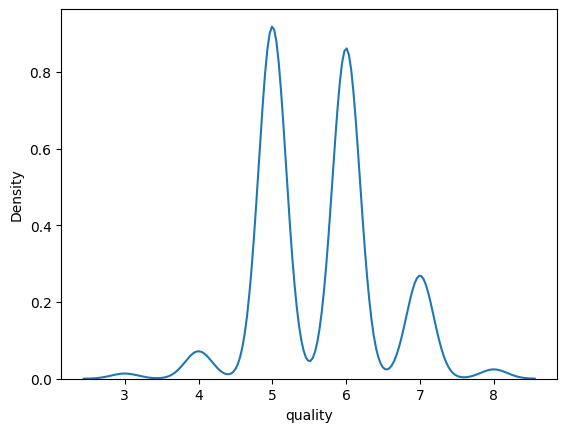

In [107]:
#Histograma
from seaborn import distplot
distplot(red_wine.quality, hist=False)

Se encuentran distribuidos entre 5 y 6 mayormente. El dataset se encuentra desbalanceando.

In [113]:
corr = red_wine.corr(numeric_only=True)
corr_quality = corr.quality.sort_values(ascending=False)

print("\n--- Correlación con quality (Pearson) ---")
print(corr_quality)

mejor_var = corr.quality.drop("quality").idxmax()
peor_var = corr.quality.drop("quality").idxmin()

print("\nVariable con mayor correlación:", mejor_var)
print("Variable con menor correlación:", peor_var)


--- Correlación con quality (Pearson) ---
quality                 1.000000
alcohol                 0.476114
sulphates               0.251163
citric acid             0.226292
fixed acidity           0.124588
residual sugar          0.013512
free sulfur dioxide    -0.050997
pH                     -0.058346
chlorides              -0.128825
total sulfur dioxide   -0.185364
density                -0.186466
volatile acidity       -0.390500
Name: quality, dtype: float64

Variable con mayor correlación: alcohol
Variable con menor correlación: volatile acidity


<Axes: >

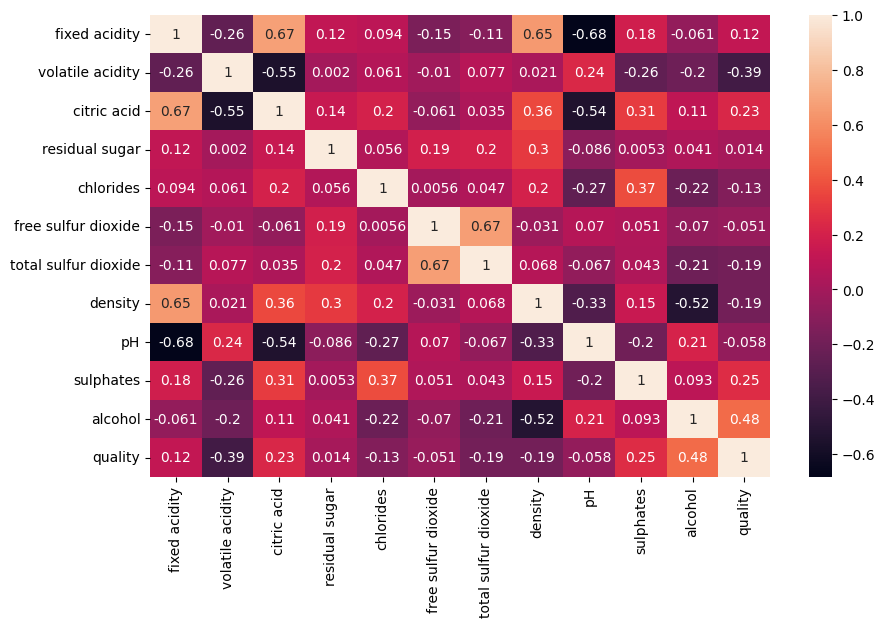

In [109]:
plt.figure(figsize=(10,6))
sns.heatmap(red_wine.corr(), annot=True)

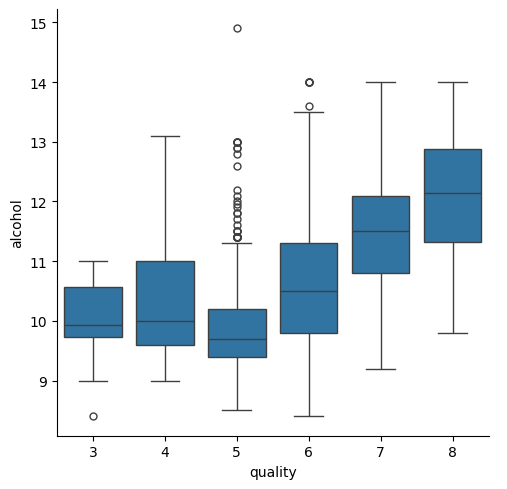

In [111]:
sns.catplot(x="quality", y="alcohol", kind="box", data=red_wine)

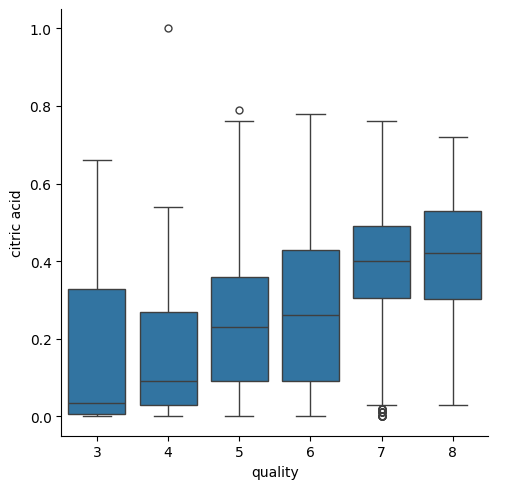

In [112]:
sns.catplot(x="quality", y="citric acid", kind="box", data=red_wine)